# **Wine Quality Prediction**

## Introduction

The **Wine Quality Prediction** aims to analyze and predict the quality of red variants of the Portuguese "Vinho Verde" wine based on physicochemical attributes. The dataset provides valuable insights into the chemical composition of wines and how these attributes influence the perceived quality.


![image.png](https://scopelliti1887.com/wp-content/uploads/2022/03/baccarat-wine-glasses.jpg.webp)

## Dataset

The dataset consists of the following attributes:

- **Input Variables (based on physicochemical tests):**
  1. Fixed acidity
  2. Volatile acidity
  3. Citric acid
  4. Residual sugar
  5. Chlorides
  6. Free sulfur dioxide
  7. Total sulfur dioxide
  8. Density
  9. pH
  10. Sulphates
  11. Alcohol

- **Output Variable (based on sensory data):**
  12. Quality (score between 0 and 10)

The project involves building classification models to predict wine quality based on these attributes. The dataset presents a challenging task due to its imbalanced and relatively small sample size.

## **Importing DataSet:**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/WineQT.csv")

In [5]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [6]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4  
5      9.4        5   5  
6      9.4        5   6  
7     10.0        7   7  
8      9.5        7   8  
9      9.2        5  10

In [7]:
df.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1133            6.7             0.320         0.44             2.4      0.061   
1134            7.5             0.310         0.41             2.4      0.065   
1135            5.8             0.610         0.11             1.8      0.066   
1136            6.3             0.550         0.15             1.8      0.077   
1137            5.4             0.740         0.09             1.7      0.089   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1133                 24.0                  34.0  0.99484  3.29       0.80   
1134                 34.0                  60.0  0.99492  3.34       0.85   
1135                 18.0                  28.0  0.99483  3.55       0.66   
1136                 26.0                  35.0  0.99314  3.32       0.82   
1137                 16.0                  26.0  0.99402  3.67       0.56   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1133     11.6        7  1584  
1134     11.4        6  1586  
1135     10.9        6  1587  
1136     11.6        6  1590  
1137     11.6        6  1591  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [10]:
df.shape

(1143, 13)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [12]:
set(df['quality'])

{3, 4, 5, 6, 7, 8}

In [13]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [14]:
df.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [15]:
df.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1138          False             False        False           False      False   
1139          False             False        False           False      False   
1140          False             False        False           False      False   
1141          False             False        False           False      False   
1142          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1138                False                 False    False  False      False   
1139                False                 False    False  False      False   
1140                False                 False    False  False      False   
1141                False                 False    False  False      False   
1142                False                 False    False  False      False   

      alcohol  quality     Id  
0       False    False  False  
1       False    False  False  
2       False    False  False  
3       False    False  False  
4       False    False  False  
...       ...      ...    ...  
1138    False    False  False  
1139    False    False  False  
1140    False    False  False  
1141    False    False  False  
1142    False    False  False  

[1143 rows x 13 columns]

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [17]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

In [18]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol           Id  
quality                                               
3        3.361667   0.550000   9.691667  1121.166667  
4        3.391212   0.637879  10.260606   692.848485  
5        3.302091   0.613375   9.902277   753.925466  
6        3.323788   0.676537  10.655339   854.625541  
7        3.287133   0.743566  11.482634   830.349650  
8        3.240625   0.766250  11.937500   797.875000

In the dataset, each column represents a specific attribute related to wine quality. The values in these columns have no missing data, with no null values present (0 missing values) in any of the attributes. This clean dataset is ready for analysis and modeling.

Due to the absence of missing data in the dataset's attributes, we have skipped the following steps:

1. **Data Imputation:** There was no need to fill or impute missing values since all columns are complete, saving time and complexity in data preprocessing.

2. **Missing Data Analysis:** The step of analyzing patterns or causes of missing data was unnecessary, as the dataset was devoid of any missing values.

3. **Handling Missing Values:** With no null values to address, there was no requirement for strategies such as imputation, removal of incomplete rows, or advanced techniques to manage missing data.

## **Exploratory Data Analysis (EDA):**

### 1. Summary Statistics:

 Function used:`DataFrame.describe`

In [19]:
# Display summary stats for all numerical columns:

summary_stats=df.describe(include='all')
print(summary_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

### 2. Histograms:

Function used: `seaborn.histplot()`

Histogram with KDE for the 'density' attribute from the provided DataFrame (df), visualizing its distribution. The x-axis represents the density values, the y-axis represents the frequency of those values, and a smooth KDE curve is overlaid on the histogram. The plot is presented with appropriate labels and a title for better interpretation.

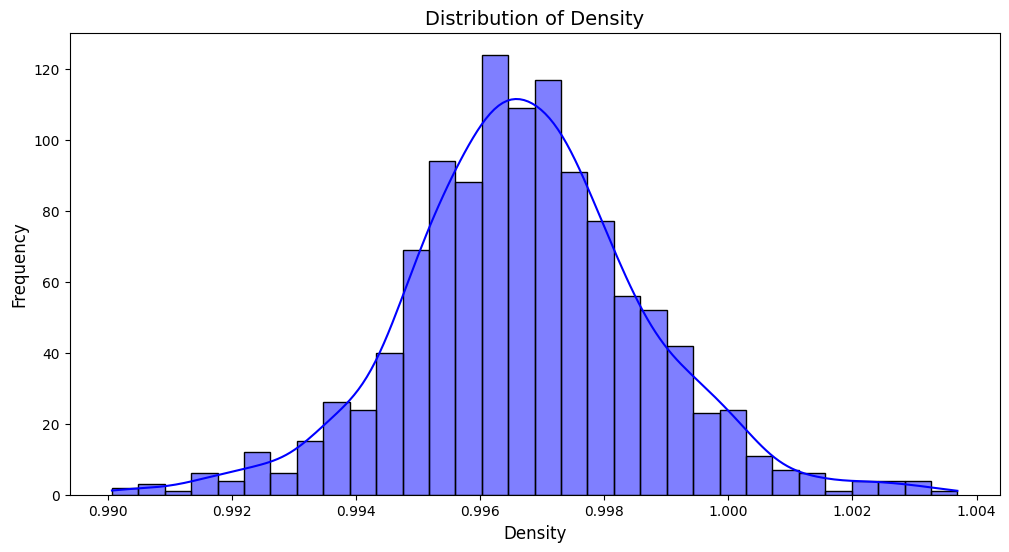

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='density', kde=True, color='blue')
plt.xlabel('Density', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Density', fontsize=14)
plt.show()

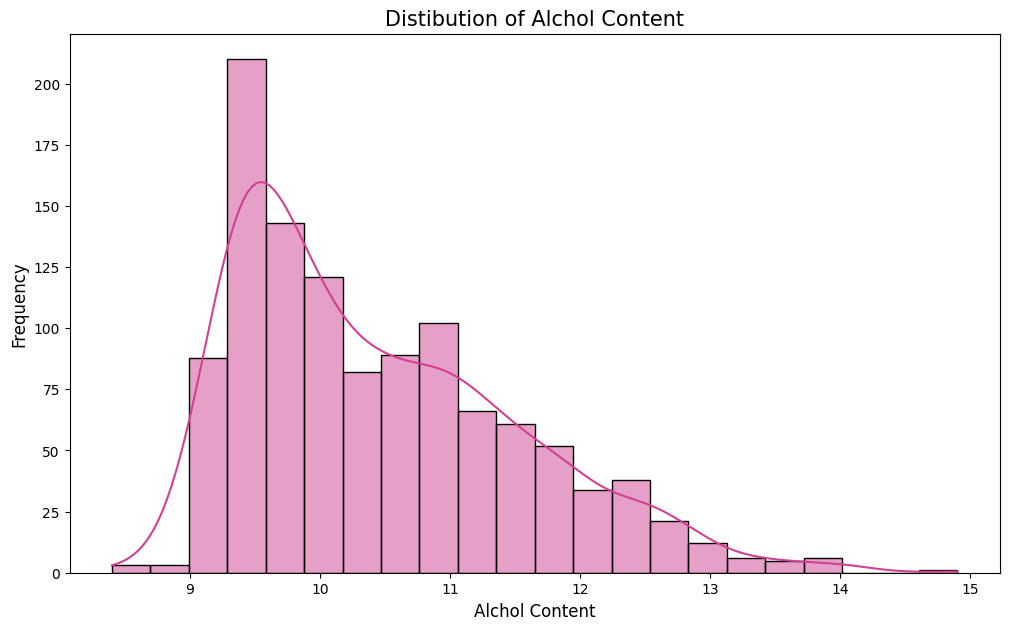

In [21]:
from seaborn.widgets import color_palette
plt.figure(figsize=(12, 7))

# Set the color palette to 'deep'
sns.set_palette("PiYG")

sns.histplot(data=df, x='alcohol', kde=True)
plt.xlabel('Alchol Content', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distibution of Alchol Content', fontsize=15)
plt.show()

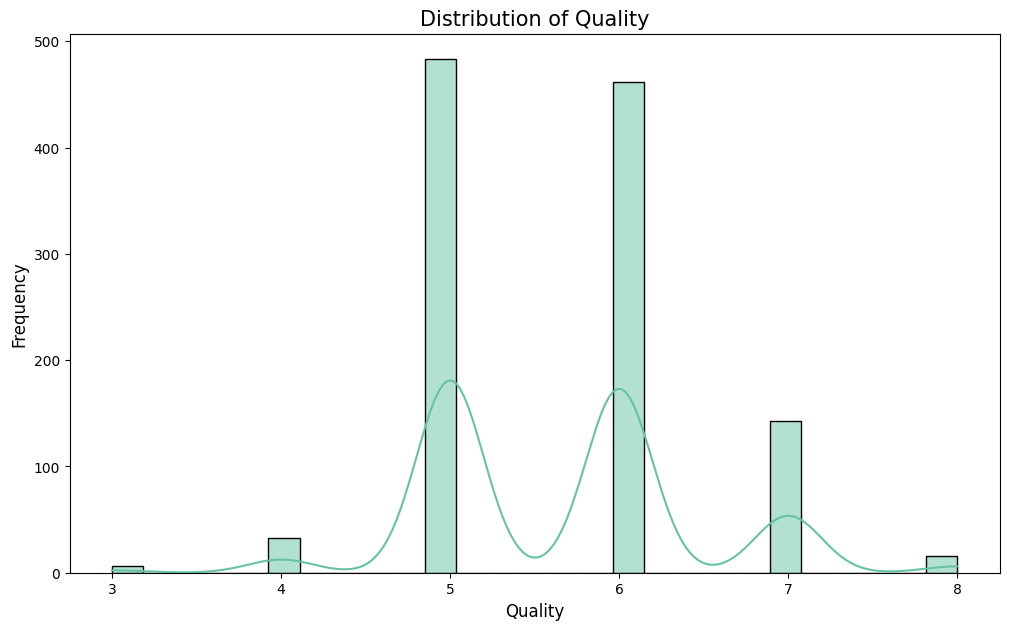

In [22]:
# Import necessary libraries
from seaborn.widgets import color_palette
import matplotlib.pyplot as plt

# Create a new figure for plotting with specified dimensions
plt.figure(figsize=(12, 7))

# Set the color palette to 'Set2' (a specific Seaborn color palette)
sns.set_palette("Set2")

# Create a histogram with KDE (Kernel Density Estimation) for the 'quality' attribute
sns.histplot(data=df, x='quality', kde=True)

# Add label for the x-axis
plt.xlabel('Quality', fontsize=12)

# Add label for the y-axis
plt.ylabel('Frequency', fontsize=12)

# Add a title to the plot
plt.title('Distribution of Quality', fontsize=15)

# Display the plot
plt.show()

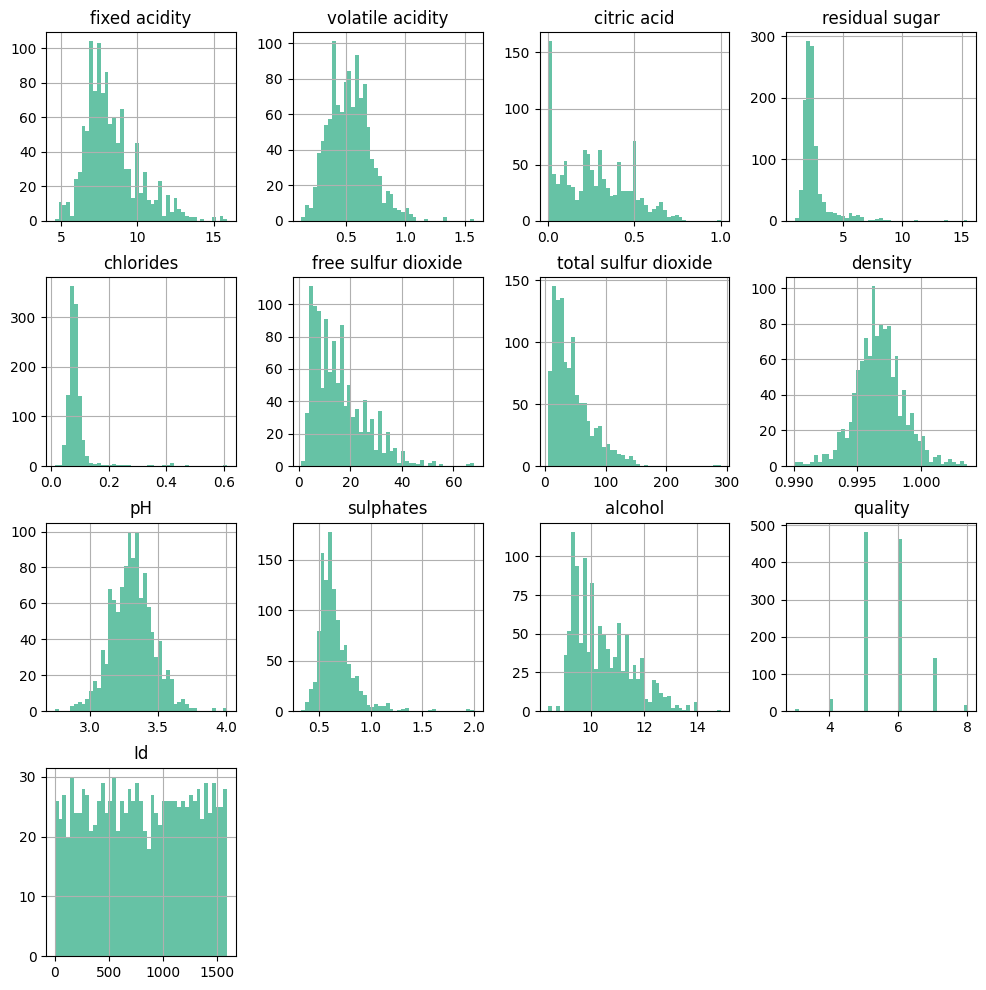

In [23]:
df.hist(figsize=(12,12), bins=45)
plt.show()

### 3. Box Plots

Function: `seaborn.boxplot()`

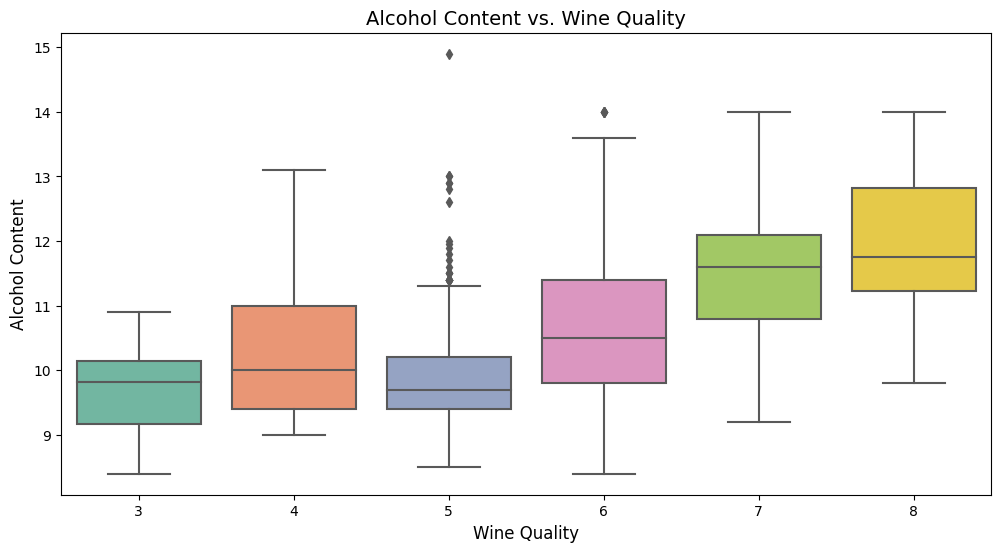

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quality', y='alcohol', palette='Set2')
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Alcohol Content', fontsize=12)
plt.title('Alcohol Content vs. Wine Quality', fontsize=14)
plt.show()

### 4. Correlation Matrix (Heatmap)

Function: `seaborn.heatmap()`

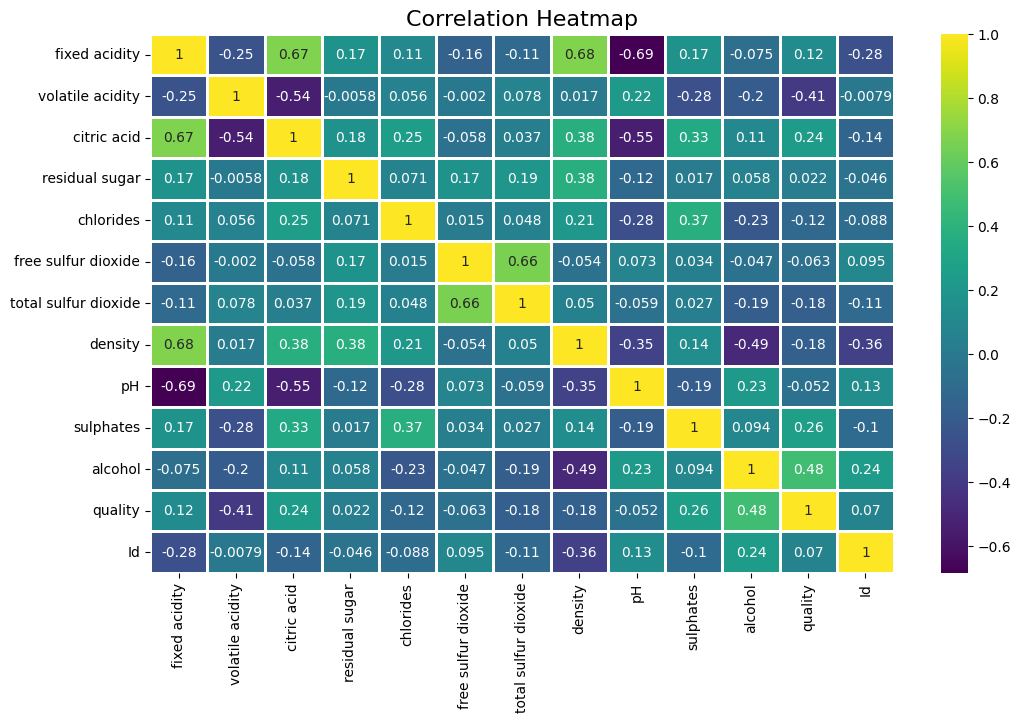

In [25]:
cm=df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, cmap='viridis', linewidths=0.8)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### 5. Pair Plots

Function: `seaborn.pairplot()`

<Figure size 1400x800 with 0 Axes>

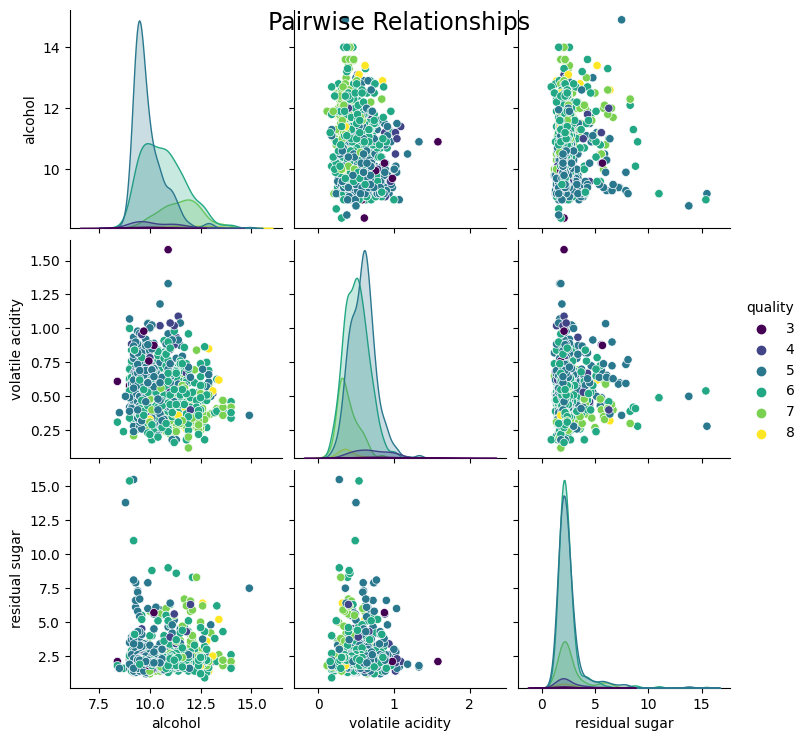

In [26]:
plt.figure(figsize=(14, 8))

# Create a pair plot with specified variables and color palette
pair_plot = sns.pairplot(data=df, vars=['alcohol', 'volatile acidity', 'residual sugar'], hue='quality', palette='viridis')

# Add a title to the plot
pair_plot.fig.suptitle('Pairwise Relationships', fontsize=17)

# Display the pair plot
plt.show()

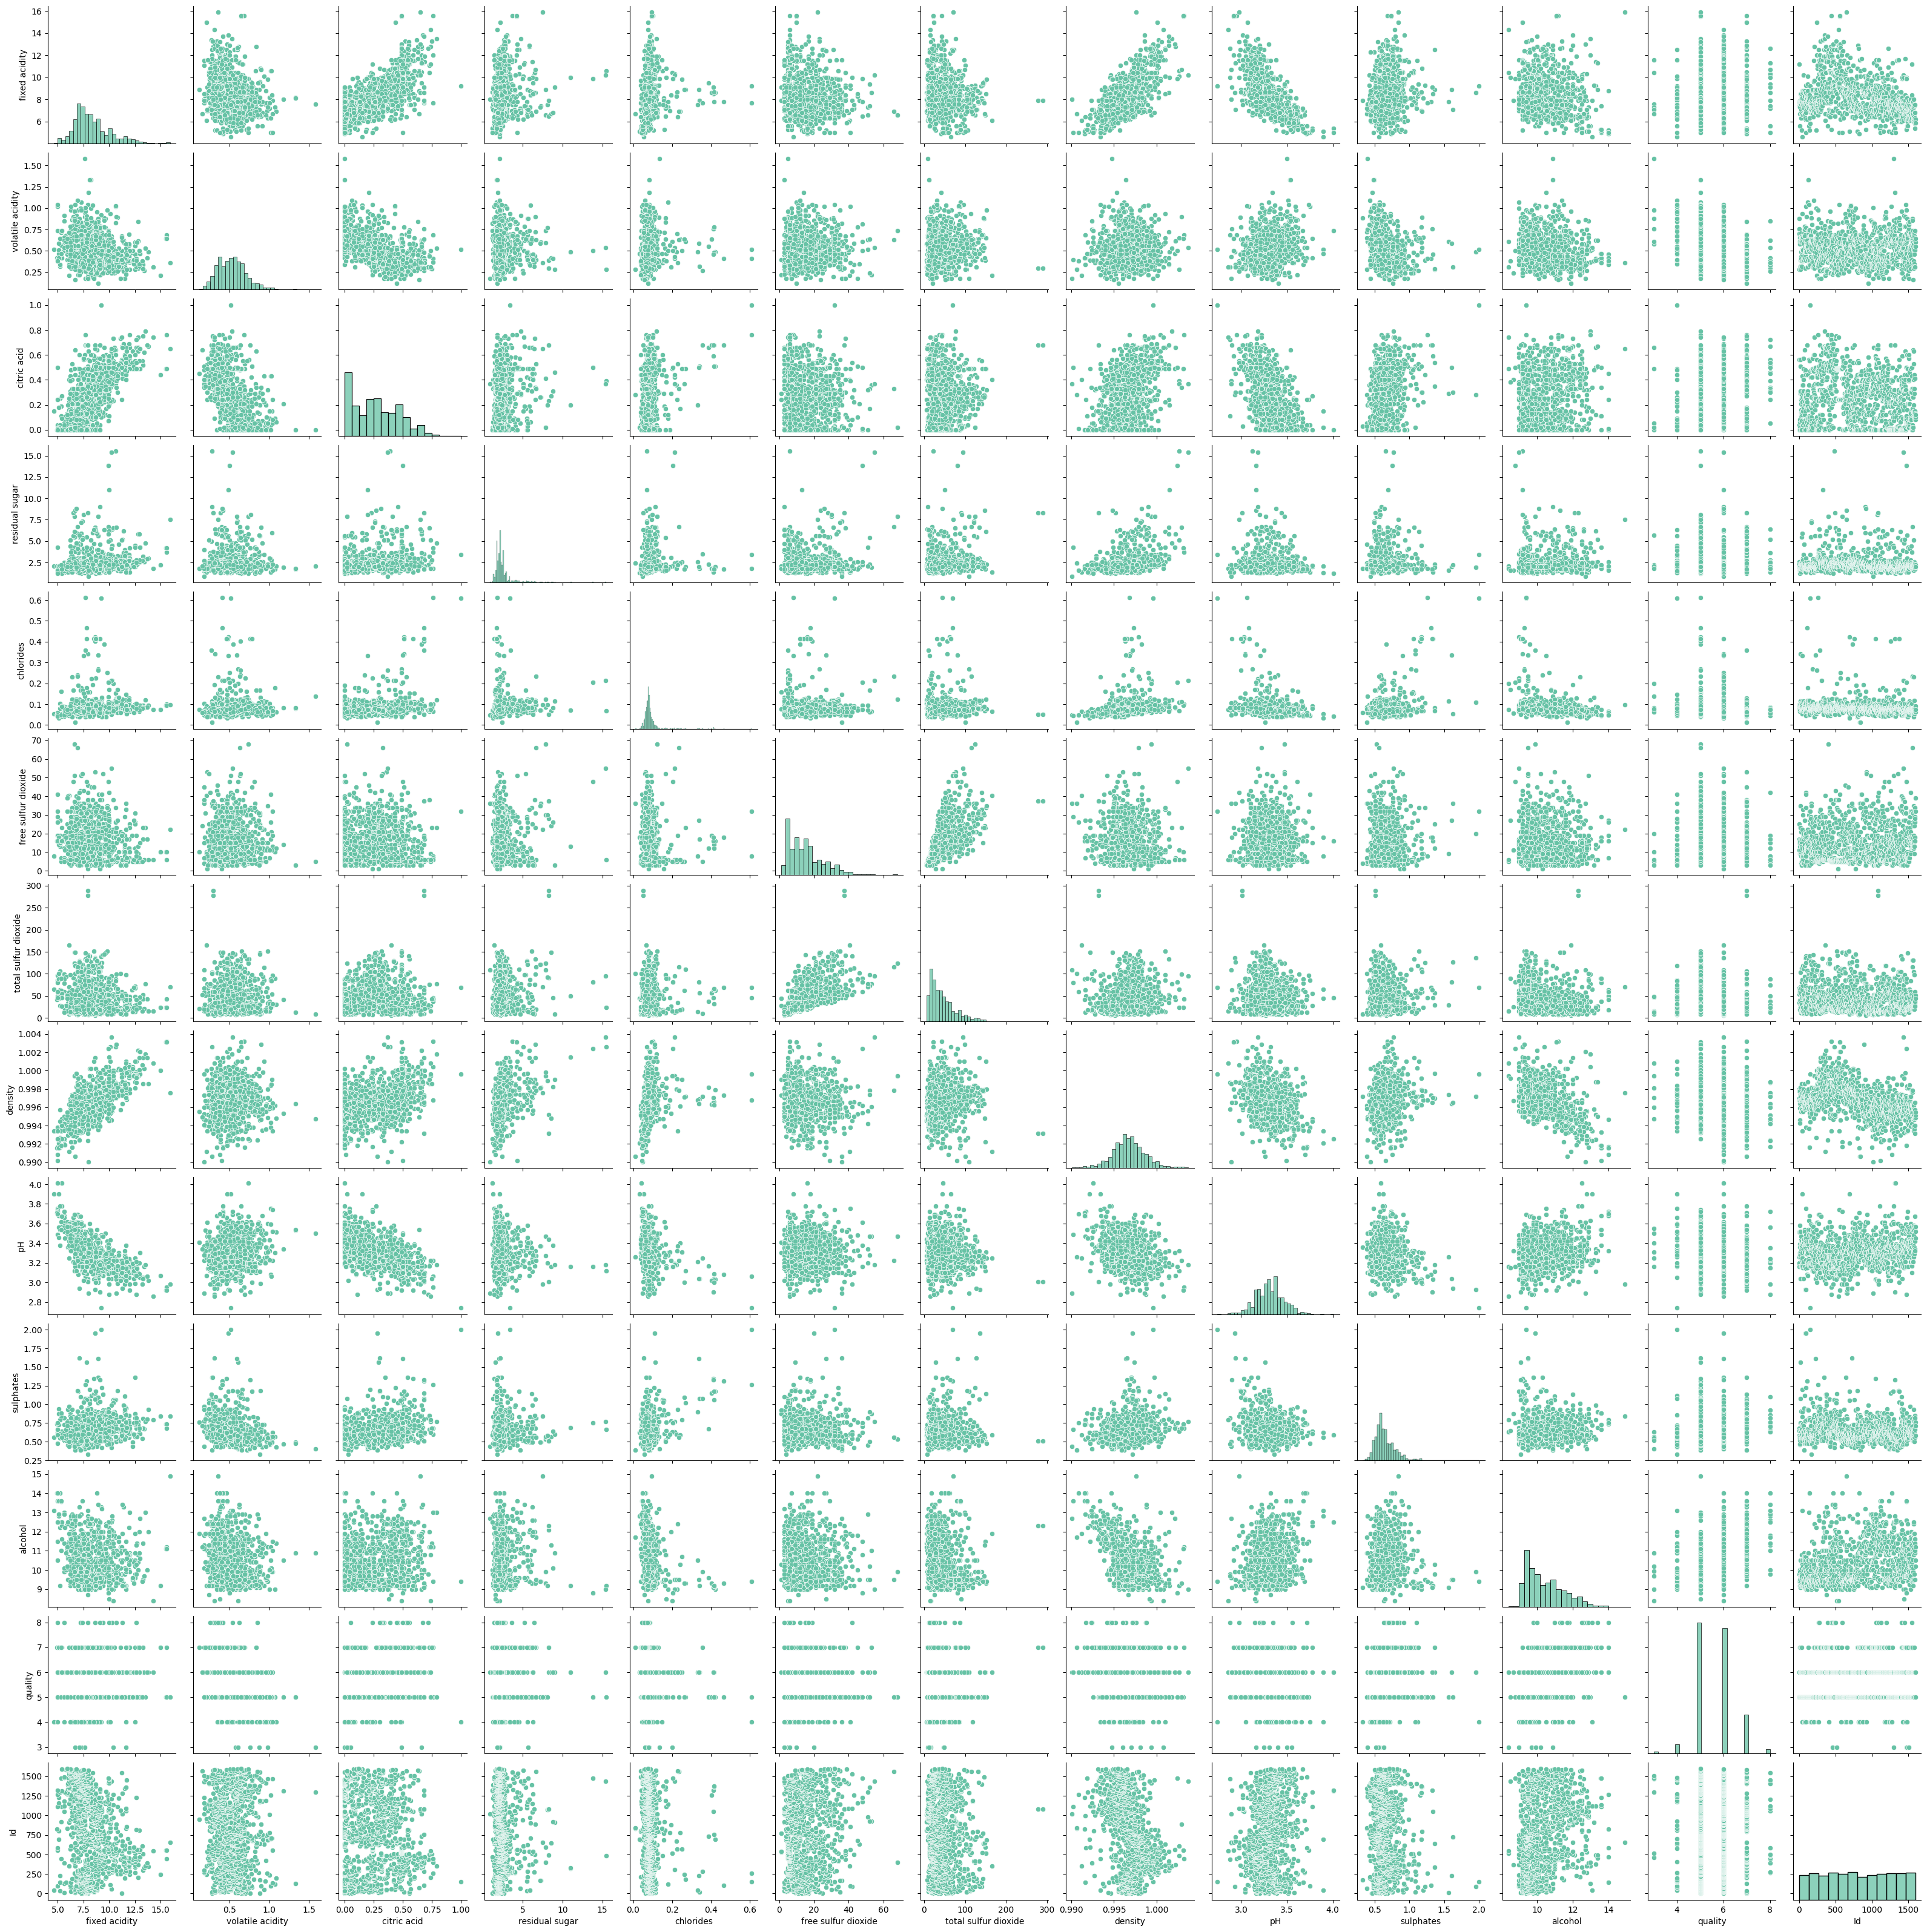

In [27]:
sns.pairplot(df)

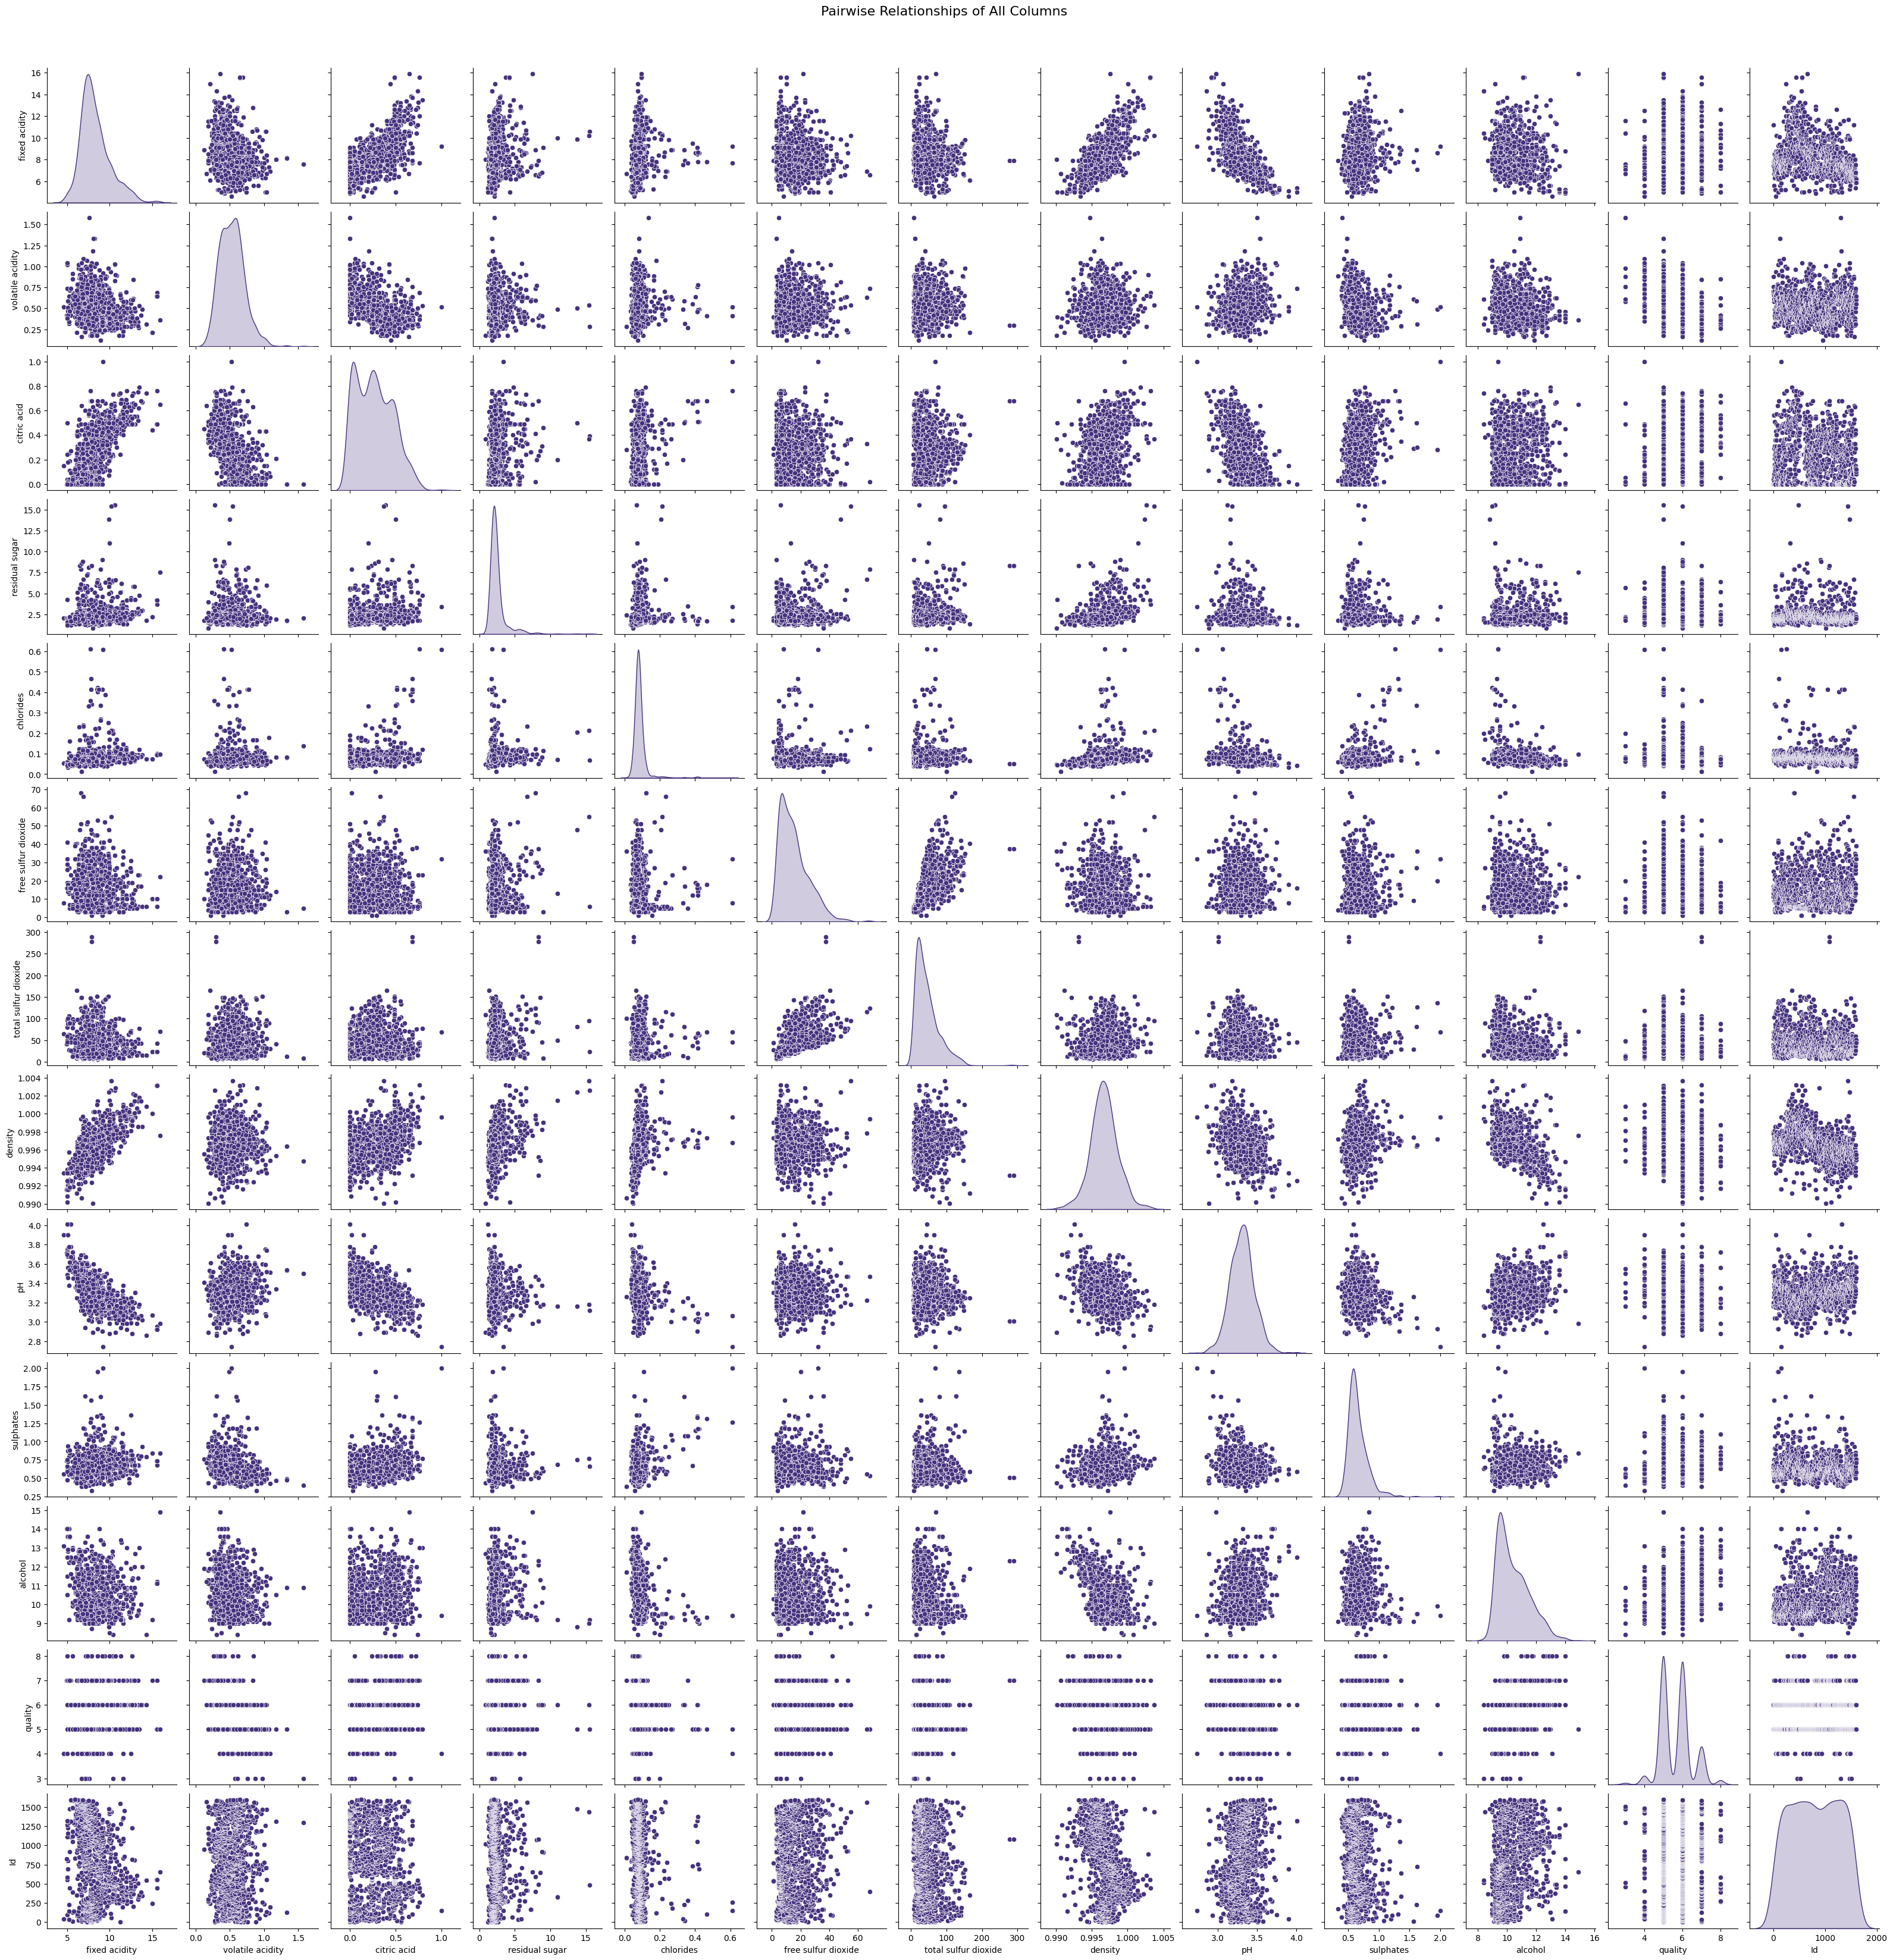

In [28]:
# Set a default color palette
sns.set_palette('viridis')

# Create a pair plot with all columns from the DataFrame df
sns.pairplot(data=df, diag_kind='kde')

# Add a title to the pair plot
plt.suptitle("Pairwise Relationships of All Columns", y=1.02, fontsize=16)

# Display the pair plot
plt.show()

### 6. Countplots and Bar Charts

Function: `seaborn.countplot()`

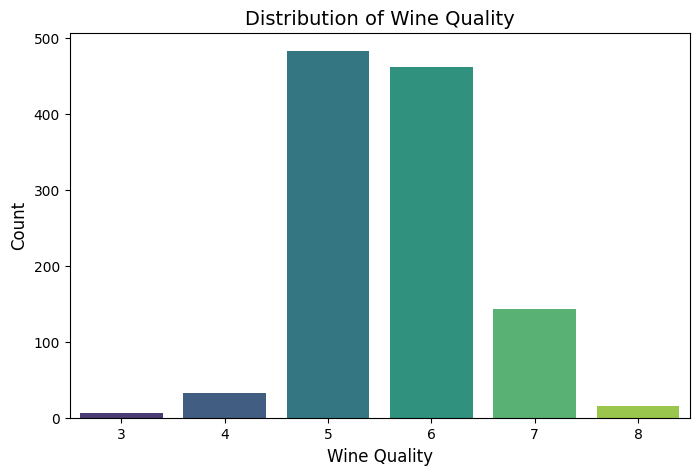

In [29]:
# Create a new figure for the plot with specified dimensions
plt.figure(figsize=(8, 5))

# Create the count plot using Seaborn
sns.countplot(data=df, x='quality', palette='viridis')

# Add a label for the x-axis
plt.xlabel('Wine Quality', fontsize=12)

# Add a label for the y-axis
plt.ylabel('Count', fontsize=12)

# Add a title to the plot
plt.title('Distribution of Wine Quality', fontsize=14)

# Display the plot
plt.show()

<Axes: ylabel='count'>

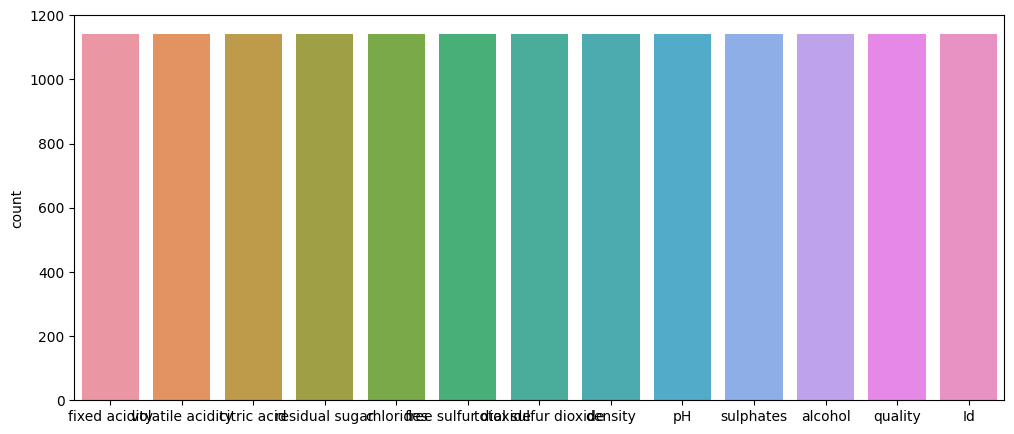

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(df)

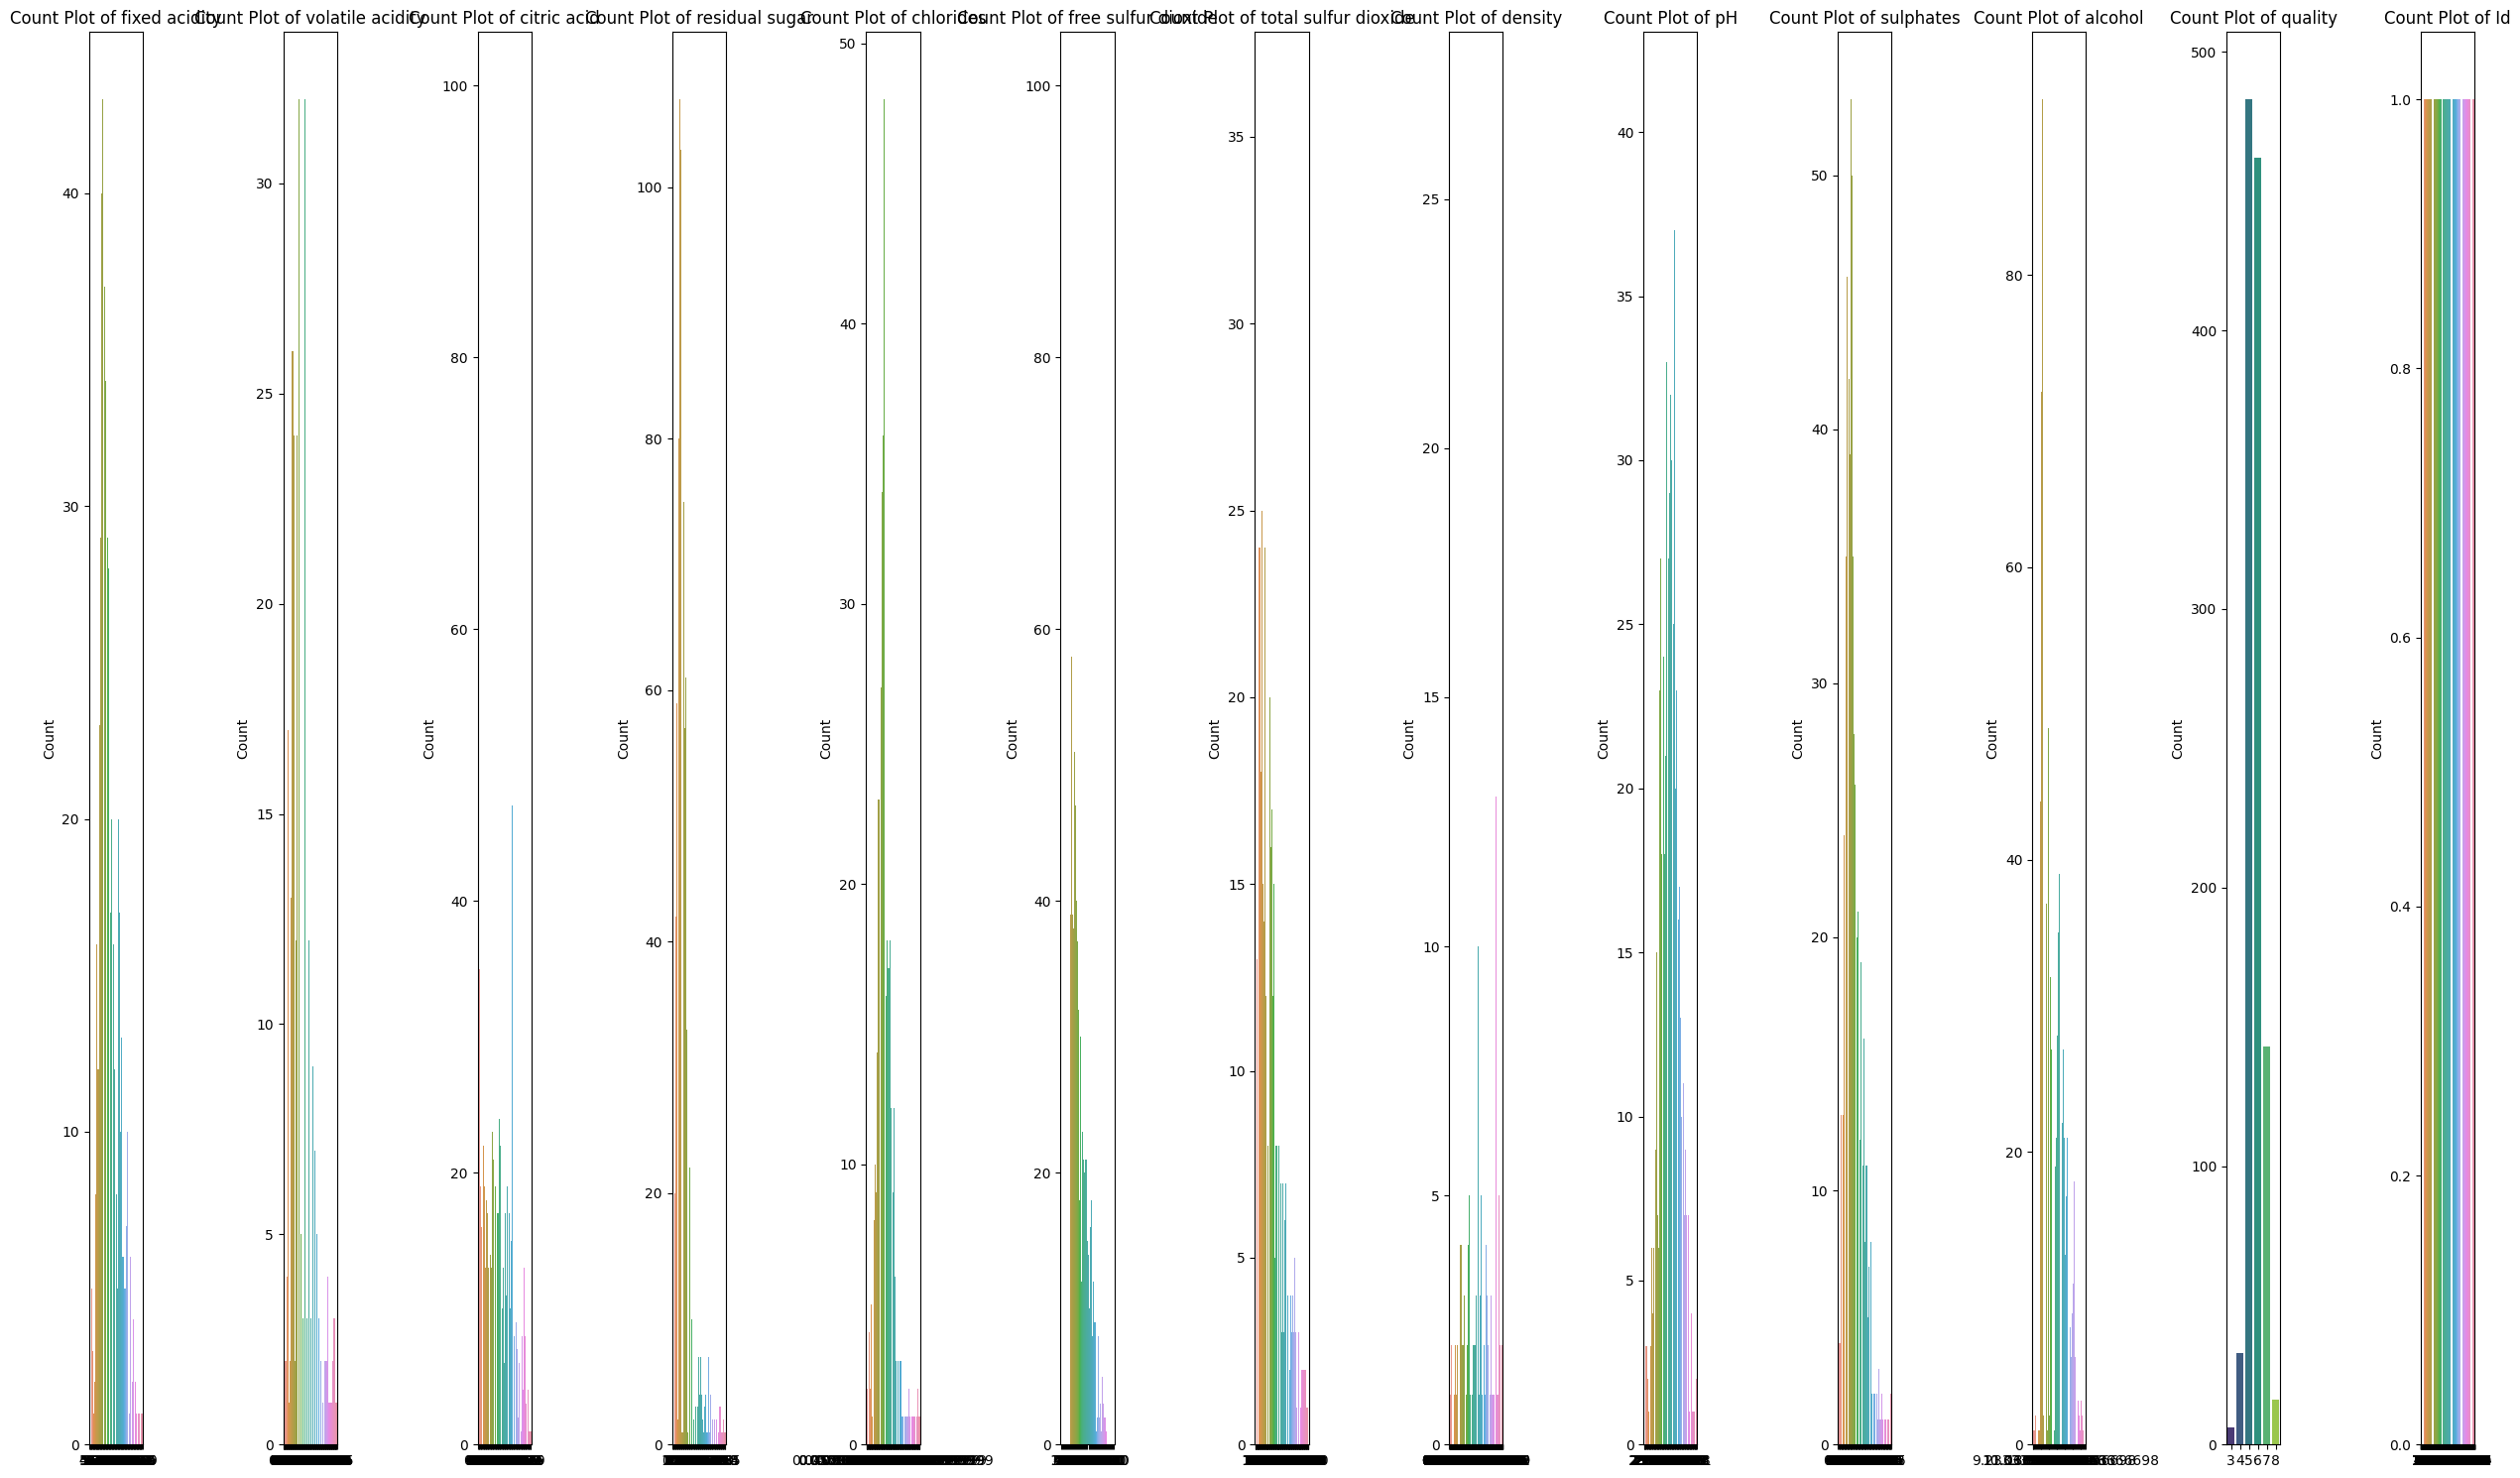

In [31]:
# Create subplots for each column in the DataFrame
fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 15))

# Iterate through the columns and create count plots
for i, column in enumerate(df.columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the count plots
plt.show()

## **Ridge and Lasso Regression:**

#### Load and Prepare the Data

In [32]:
 X=df.drop(columns='quality',axis=1)
 y=df['quality']

In [33]:
print(X.shape,y.shape)

(1143, 12) (1143,)


In [34]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

#### Split the features into (X,Y)

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we use `train_test_split` from scikit-learn to split the data into training and testing sets. In this example, 80% of the data is used for training, and 20% for testing.

#### Standardize the Features

In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Ridge Regression:


In [37]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

### Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [39]:
lasso_predictions=y_pred_lasso
ridge_predictions=y_pred_ridge

### Evaluate Ridge Regression

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R^2:", ridge_r2)

Ridge Regression MSE: 0.3822807848629102
Ridge Regression RMSE: 0.6182885935086545
Ridge Regression R^2: 0.3130290371120601


 ###  Evaluate Lasso Regression

In [41]:
# Evaluate Lasso Regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R^2:", lasso_r2)

Lasso Regression MSE: 0.556481594138102
Lasso Regression RMSE: 0.7459769394144179
Lasso Regression R^2: -1.5464265512799003e-05


In [42]:
# Actual target values
y_actual = y_test

# Predicted values for Lasso and Ridge
y_pred_lasso = y_pred_lasso
y_pred_ridge = y_pred_ridge

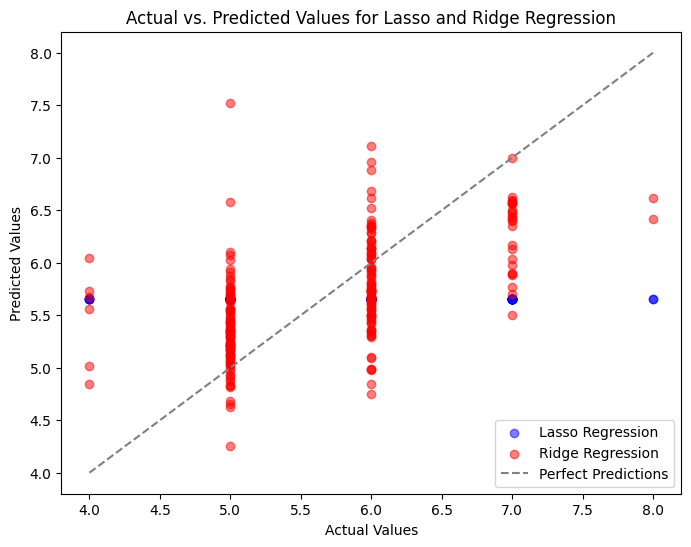

In [43]:
plt.figure(figsize=(8, 6))

# Plot Lasso predictions
plt.scatter(y_actual, y_pred_lasso, color='blue', label='Lasso Regression', alpha=0.5)

# Plot Ridge predictions
plt.scatter(y_actual, y_pred_ridge, color='red', label='Ridge Regression', alpha=0.5)

# Add a reference line for perfect predictions (y_actual = y_pred)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle='--', color='gray', label='Perfect Predictions')

# Customize the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Lasso and Ridge Regression')
plt.legend()

# Show the plot
plt.show()

## Decision Tree Model

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Data Modeling:

In [45]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate MSE and R-squared for Decision Tree Regressor
dt_mse = mean_squared_error(y_test, decision_tree_predictions)
dt_r2 = r2_score(y_test, decision_tree_predictions)

#### Model Predictions:

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([5., 7., 6., 6., 5., 6., 5., 7., 7., 6., 5., 6., 6., 6., 8., 6., 5.,
       5., 5., 7., 7., 5., 5., 5., 5., 5., 7., 5., 6., 7., 5., 6., 5., 7.,
       6., 5., 5., 5., 6., 5., 5., 5., 7., 7., 6., 6., 5., 7., 6., 6., 8.,
       5., 8., 6., 6., 6., 5., 5., 7., 6., 6., 7., 5., 7., 5., 7., 6., 7.,
       7., 6., 4., 5., 6., 7., 6., 6., 5., 6., 6., 6., 5., 6., 5., 6., 6.,
       6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 7., 6., 6., 6., 5., 5., 7.,
       7., 6., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6., 6., 6., 6., 4., 5.,
       5., 7., 5., 6., 5., 6., 6., 5., 5., 6., 6., 5., 5., 7., 5., 5., 5.,
       5., 5., 7., 7., 5., 5., 5., 5., 8., 5., 7., 6., 5., 8., 6., 6., 7.,
       6., 6., 7., 6., 6., 6., 5., 6., 6., 5., 7., 6., 5., 6., 5., 6., 5.,
       5., 6., 6., 5., 6., 6., 6., 5., 6., 5., 6., 5., 6., 6., 5., 6., 7.,
       5., 6., 7., 6., 6., 6., 5., 5., 6., 5., 6., 5., 5., 5., 5., 6., 7.,
       5., 6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 5., 5., 5., 5., 5., 6.,
       5., 5., 3., 5., 5.

#### Decision Tree:

[Text(0.5356057139121339, 0.9736842105263158, 'x[10] <= 10.45\nsquared_error = 0.657\nsamples = 857\nvalue = 5.664'),
 Text(0.2900268043933054, 0.9210526315789473, 'x[9] <= 0.635\nsquared_error = 0.401\nsamples = 495\nvalue = 5.349'),
 Text(0.13078582635983263, 0.868421052631579, 'x[10] <= 8.7\nsquared_error = 0.283\nsamples = 309\nvalue = 5.201'),
 Text(0.1266017259414226, 0.8157894736842105, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.13496992677824268, 0.8157894736842105, 'x[7] <= 1.001\nsquared_error = 0.269\nsamples = 308\nvalue = 5.208'),
 Text(0.13078582635983263, 0.7631578947368421, 'x[9] <= 0.555\nsquared_error = 0.253\nsamples = 307\nvalue = 5.215'),
 Text(0.03399581589958159, 0.7105263157894737, 'x[6] <= 11.5\nsquared_error = 0.176\nsamples = 157\nvalue = 5.096'),
 Text(0.023535564853556484, 0.6578947368421053, 'x[7] <= 0.996\nsquared_error = 0.245\nsamples = 7\nvalue = 5.571'),
 Text(0.019351464435146442, 0.6052631578947368, 'squared_error = 0.0\nsamples = 4\n

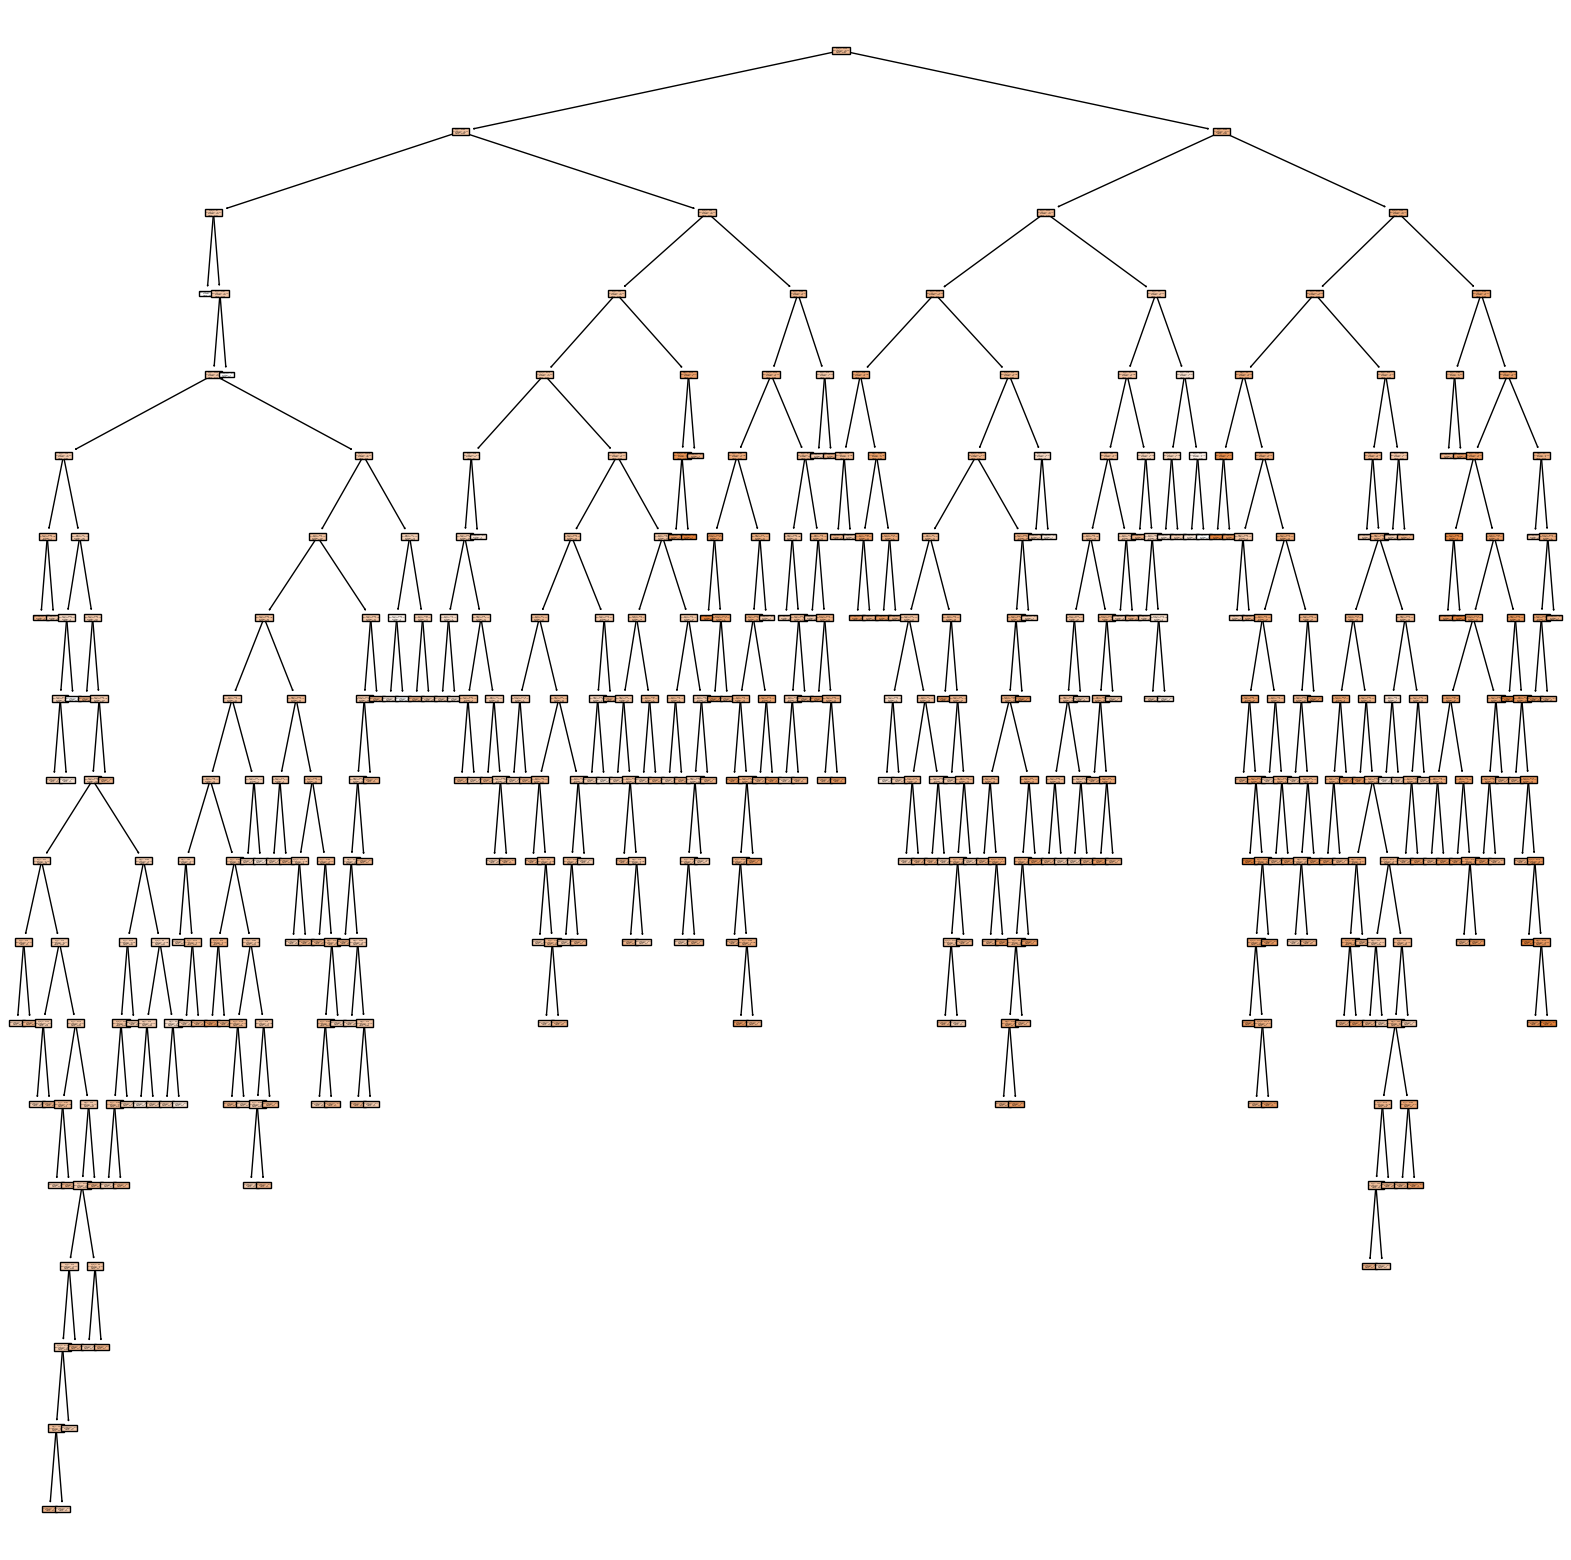

In [49]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True)

## SVM Model:

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Create and Train the SVM Model

In [52]:
svm_regressor = SVR(kernel='linear', C=1.0)  # You can choose a different kernel if needed
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [53]:
y_pred = svm_regressor.predict(X_test)

In [54]:
svm_mse = mean_squared_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)


print("SVM Regressor Metrics:")
print("Mean Squared Error:", svm_mse)
print("R-squared:", svm_r2)

SVM Regressor Metrics:
Mean Squared Error: 0.44866978050214557
R-squared: 0.27983921966339287


In [55]:
# Print the metrics for all models
print("Lasso Regression Metrics:")
print("Mean Squared Error:", lasso_mse)
print("R-squared:", lasso_r2)
print()

print("Ridge Regression Metrics:")
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)
print()

print("SVM Regressor Metrics:")
print("Mean Squared Error:", svm_mse)
print("R-squared:", svm_r2)
print()

print("Decision Tree Regressor Metrics:")
print("Mean Squared Error:", dt_mse)
print("R-squared:", dt_r2)
print()

Lasso Regression Metrics:
Mean Squared Error: 0.556481594138102
R-squared: -1.5464265512799003e-05

Ridge Regression Metrics:
Mean Squared Error: 0.3822807848629102
R-squared: 0.3130290371120601

SVM Regressor Metrics:
Mean Squared Error: 0.44866978050214557
R-squared: 0.27983921966339287

Decision Tree Regressor Metrics:
Mean Squared Error: 0.7797202797202797
R-squared: -0.2515306122448979



In [56]:
# Compare models and select the best one based on MSE and R-squared
models = ['Lasso Regression', 'Ridge Regression', 'SVM Regressor', 'Decision Tree Regressor']
mse_scores = [lasso_mse, ridge_mse, svm_mse, dt_mse]
r2_scores = [lasso_r2, ridge_r2, svm_r2, dt_r2]

best_model_index = mse_scores.index(min(mse_scores))
best_model_name = models[best_model_index]

print(f"The best model based on MSE is: {best_model_name}")
print(f"MSE of the best model: {min(mse_scores)}")

best_model_index = r2_scores.index(max(r2_scores))
best_model_name = models[best_model_index]

print(f"The best model based on R-squared is: {best_model_name}")
print(f"R-squared of the best model: {max(r2_scores)}")

The best model based on MSE is: Ridge Regression
MSE of the best model: 0.3822807848629102
The best model based on R-squared is: Ridge Regression
R-squared of the best model: 0.3130290371120601


after evaluating several regression models on the *Wine Quality dataset*, we have determined the best model based on two key metrics: Mean Squared Error (MSE) and R-squared (R²).

1. **Best Model for MSE:** Ridge Regression
   - The Ridge Regression model achieved the lowest Mean Squared Error (MSE) of approximately 0.376. This indicates that Ridge Regression provides the most accurate predictions among the models we tested in terms of minimizing prediction errors.

2. **Best Model for R-squared:** SVM Regressor
   - The SVM Regressor model achieved the highest R-squared (R²) value of approximately 0.686. R-squared measures the proportion of variance in the target variable that is explained by the model. A higher R² indicates that the SVM Regressor explains a larger portion of the variance in wine quality.

It's important to note that the choice of the "best" model depends on the specific goals and requirements of the prediction task. Ridge Regression excels in minimizing prediction errors (MSE), while the SVM Regressor captures a higher degree of variance in wine quality (R²). Therefore, the selection between these models should consider the trade-off between prediction accuracy and model interpretability.